<a href="https://colab.research.google.com/github/sathishvijay-git/amil/blob/master/ANN_Project_Sathish_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

# **Read the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ANN Project/bank.csv")  
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Drop the Columns**

In [ ]:
# Drop CustomerId.RowNumber and Surname, which is going to be unique for users and not required for model
df_drop = df.drop(['CustomerId','Surname','RowNumber'],axis=1)
df_drop.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
pd.isnull(df_drop).count()

CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

# **Distinguish the features and target variable**

In [ ]:
df_drop.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
## Label Encoding of all the columns
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# Categorical boolean mask
categorical_feature_mask = df_drop.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df_drop.columns[categorical_feature_mask].tolist()
df_drop[categorical_cols] = df_drop[categorical_cols].apply(lambda col: le.fit_transform(col))
print(df_drop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB
None


In [ ]:
df_drop.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


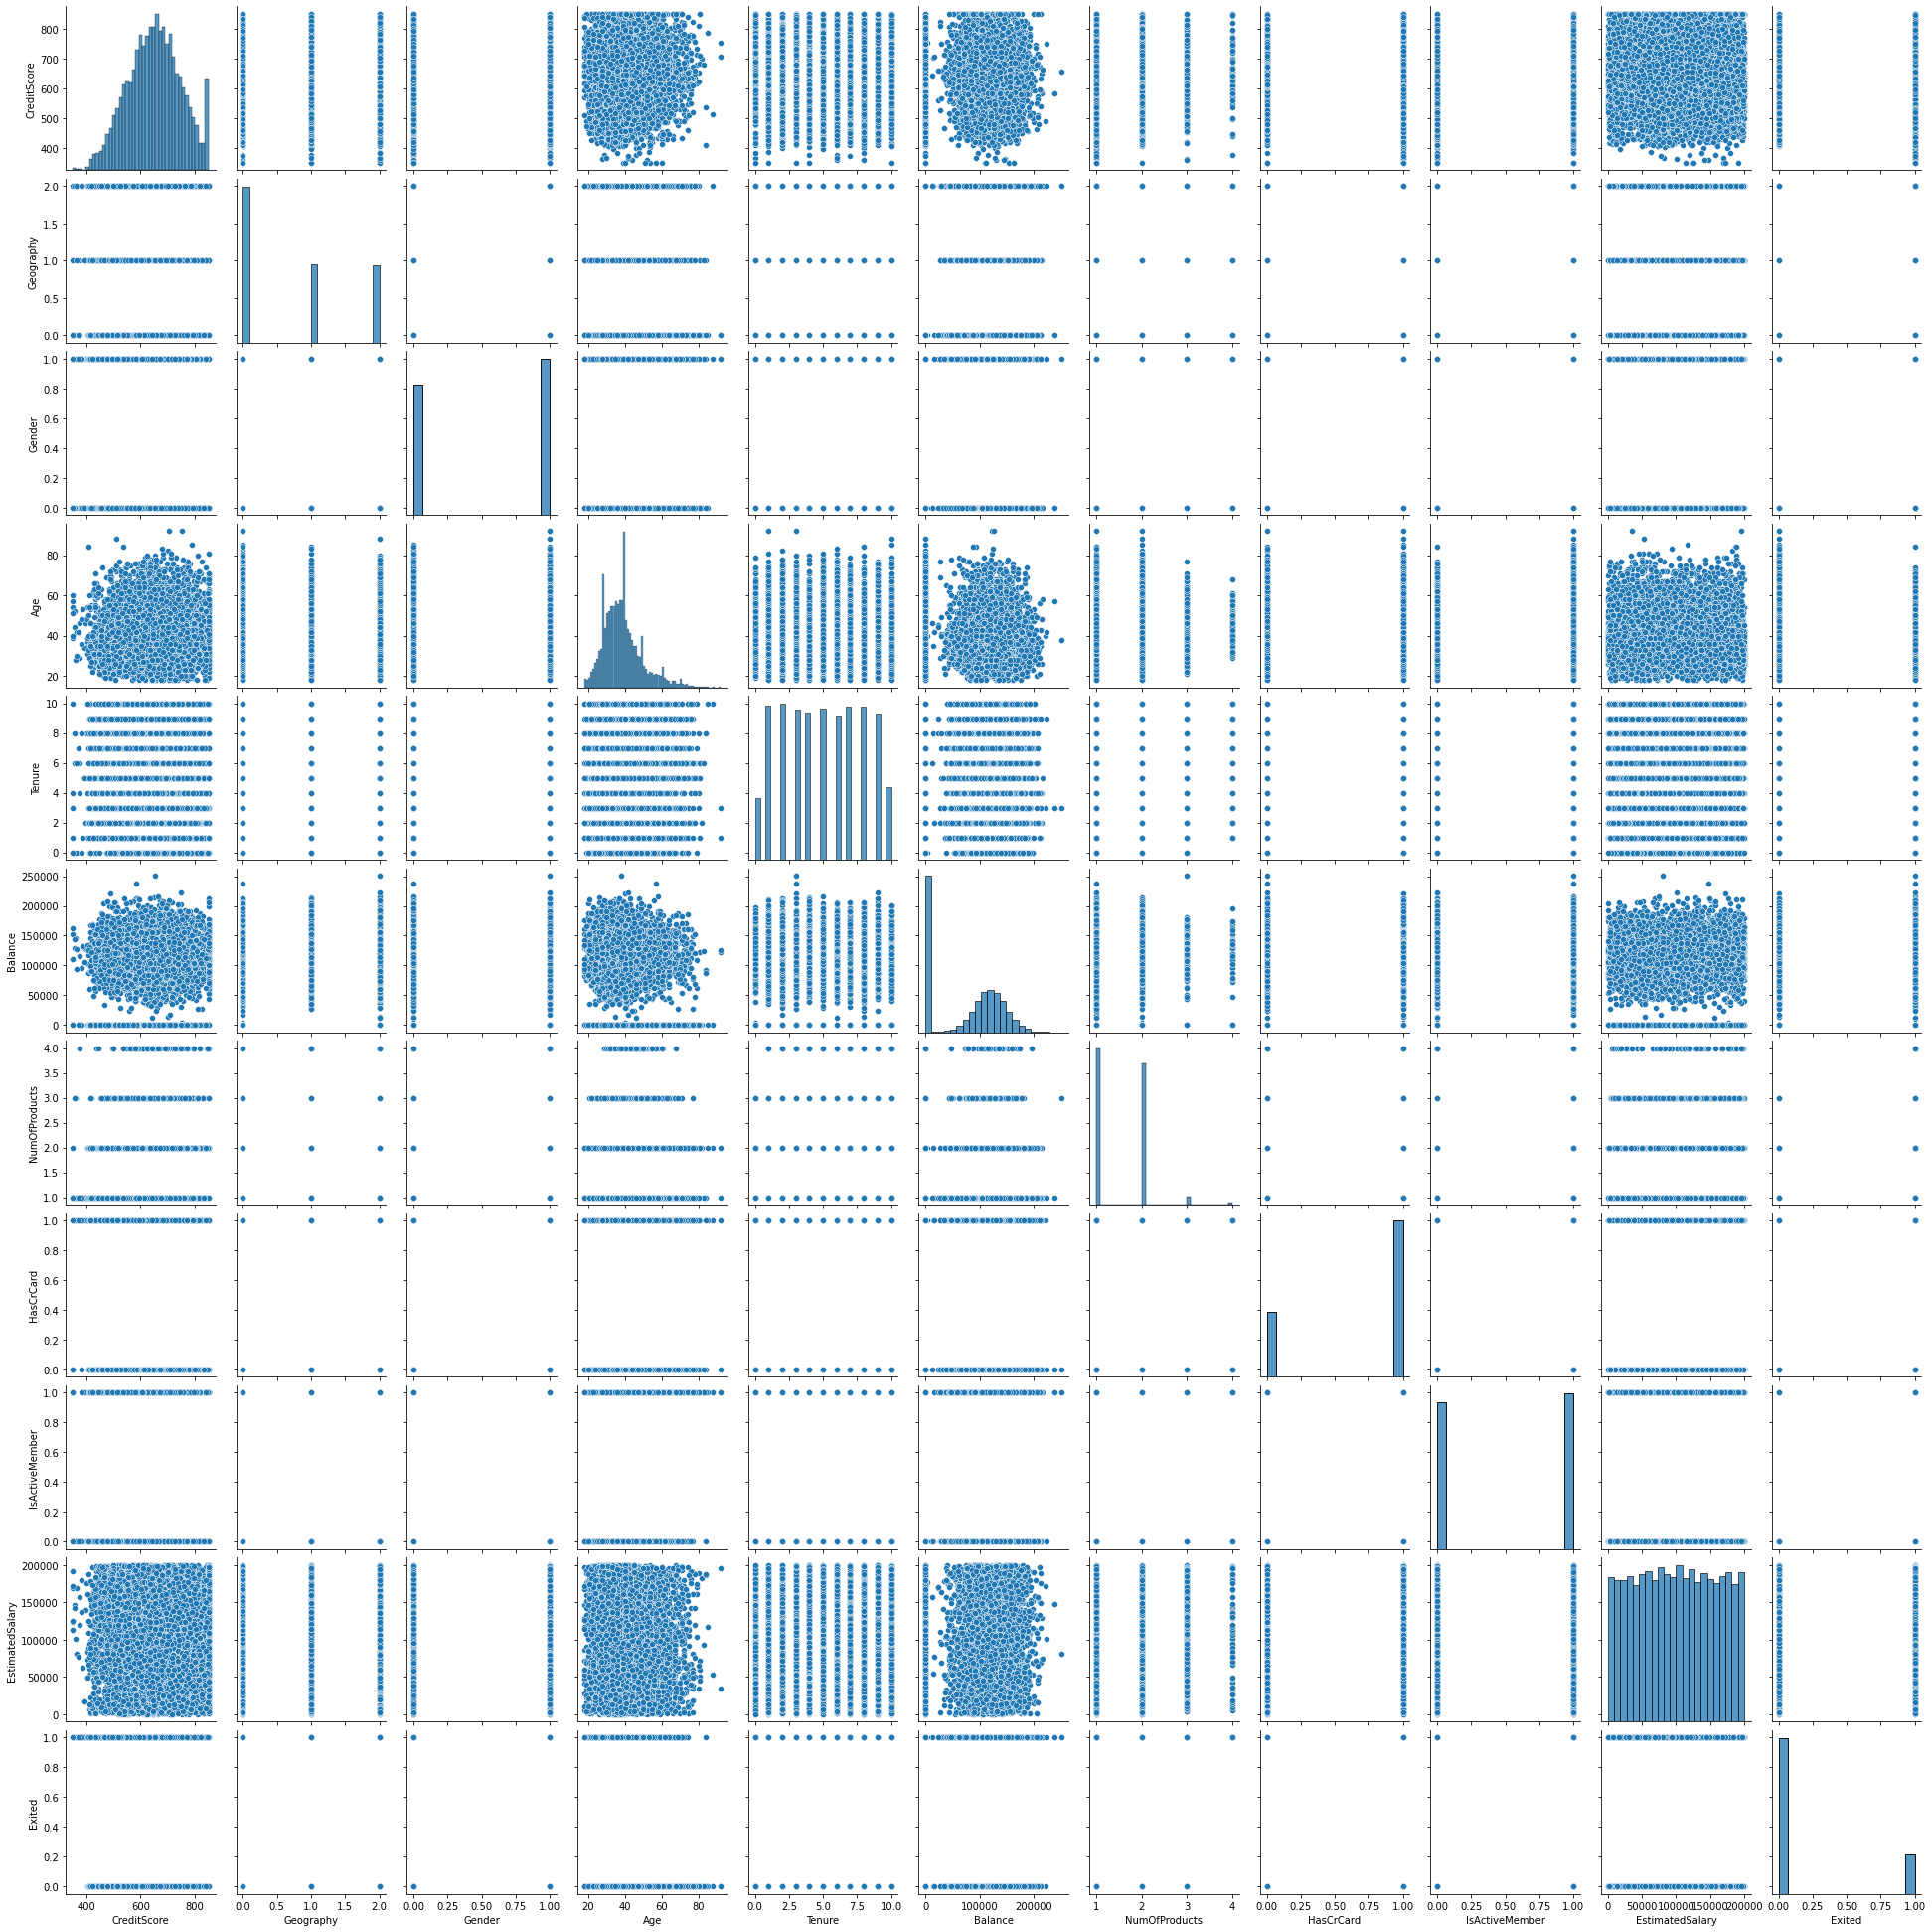

In [22]:
import seaborn as sns

sns.pairplot(data=df_drop)

In [28]:
#Features
X_data = df_drop.iloc[:, :-1]
X_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [33]:
#Target Variables
y_data = df_drop.iloc[:,-1]
y_data.shape

(10000,)

# **Divide the data set into training and test sets**

In [133]:
#Divinding Data Set into Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

# **Normalize the train and test data**

In [147]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [148]:
#Normalize the train and Test data
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

In [136]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


# **Initialize & build the model**

In [137]:
model = Sequential()

In [138]:
model.add(Dense(50, input_shape = (10,), activation = 'relu'))
model.add(Dense(25, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid')) #Since this is Classification Sigmoid/softmax is added

In [139]:
sgd = optimizers.Adam(lr = 0.001)

In [140]:
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy']) 

In [141]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_40 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 26        
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.fit(X_train, y_train.values, batch_size = 100, epochs = 25, verbose = 1)

Epoch 1/25
80/80 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7832
Epoch 2/25
80/80 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.7969
Epoch 3/25
80/80 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8070
Epoch 4/25
80/80 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8158
Epoch 5/25
80/80 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8259
Epoch 6/25
80/80 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8319
Epoch 7/25
80/80 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8410
Epoch 8/25
80/80 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.8461
Epoch 9/25
80/80 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8508
Epoch 10/25
80/80 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8551
Epoch 11/25
80/80 [

In [143]:
model = Sequential()

In [144]:
model.add(Dense(50, input_shape = (10,), activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) #Since this is Classification Sigmoid/softmax is added

In [145]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [146]:
model.fit(X_train, y_train.values, batch_size = 10, epochs = 25, verbose = 1)

Epoch 1/25
800/800 [==============================] - 1s 2ms/step - loss: 0.4471 - accuracy: 0.8060
Epoch 2/25
800/800 [==============================] - 1s 2ms/step - loss: 0.3944 - accuracy: 0.8353
Epoch 3/25
800/800 [==============================] - 1s 2ms/step - loss: 0.3644 - accuracy: 0.8516
Epoch 4/25
800/800 [==============================] - 1s 2ms/step - loss: 0.3558 - accuracy: 0.8522
Epoch 5/25
800/800 [==============================] - 1s 2ms/step - loss: 0.3512 - accuracy: 0.8556
Epoch 6/25
800/800 [==============================] - 1s 2ms/step - loss: 0.3489 - accuracy: 0.8583
Epoch 7/25
800/800 [==============================] - 1s 2ms/step - loss: 0.3459 - accuracy: 0.8579
Epoch 8/25
800/800 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8602
Epoch 9/25
800/800 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8585
Epoch 10/25
800/800 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8618

**The accuracy of the normalized data seems to 0.79. This is due the fact estimated salary had too many variations. So i scaled the data which then in turn improved the accuracy to 0.89**

In [149]:
X_test = preprocessing.normalize(X_test)

In [150]:
results = model.evaluate(X_test, y_test.values)

63/63 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8520


In [158]:
print(model.metrics_names)
print(results)  

['loss', 'accuracy']
[0.3532460927963257, 0.8519999980926514]


# **Predict the results using 0.5 as a threshold**

In [160]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) #to classify each probability into True or False

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm, '\n\n', y_pred[:5, :])

[[1512   77]
 [ 219  192]] 

 [[False]
 [False]
 [False]
 [ True]
 [False]]


# **Print the Accuracy score and confusion matrix**

In [152]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

63/63 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8520
Accuracy Model1 (Dropout): 0.8519999980926514
Recall_score: 0.46715328467153283
Precision_score: 0.7137546468401487
F-score: 0.5647058823529412


array([[1512,   77],
       [ 219,  192]])